In [1]:
# Import relevant packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### The dataset has both numeric and categorical variable
#### Category variables: season, mnth,  weekday,  weathersit 
#### Binary numeric: yr, holiday, workingday
#### Numeric variables: instant, dteday, temp, atemp, hum, windspeed, casual, registered, cnt

In [7]:
#lets get rid of features that are redundant and not of interest to us
bike.drop(['instant','dteday','atemp','casual','registered'], axis = 1, inplace = True)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [8]:
#lets convert categorical variable that has numeric representation to proper categorical form

# feature - Season
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# feature - mnth
bike.mnth = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# feature - weekday
bike.weekday = bike.weekday.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

# feature - weathersit
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'})

In [9]:
# modified dataset
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,Dec,0,Sat,1,Mist + Cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,Dec,0,Sun,0,Mist + Cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,Dec,0,Mon,0,Clear,10.489153,48.3333,23.500518,1796


In [10]:
# null values in our features
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

# Data Visualisation

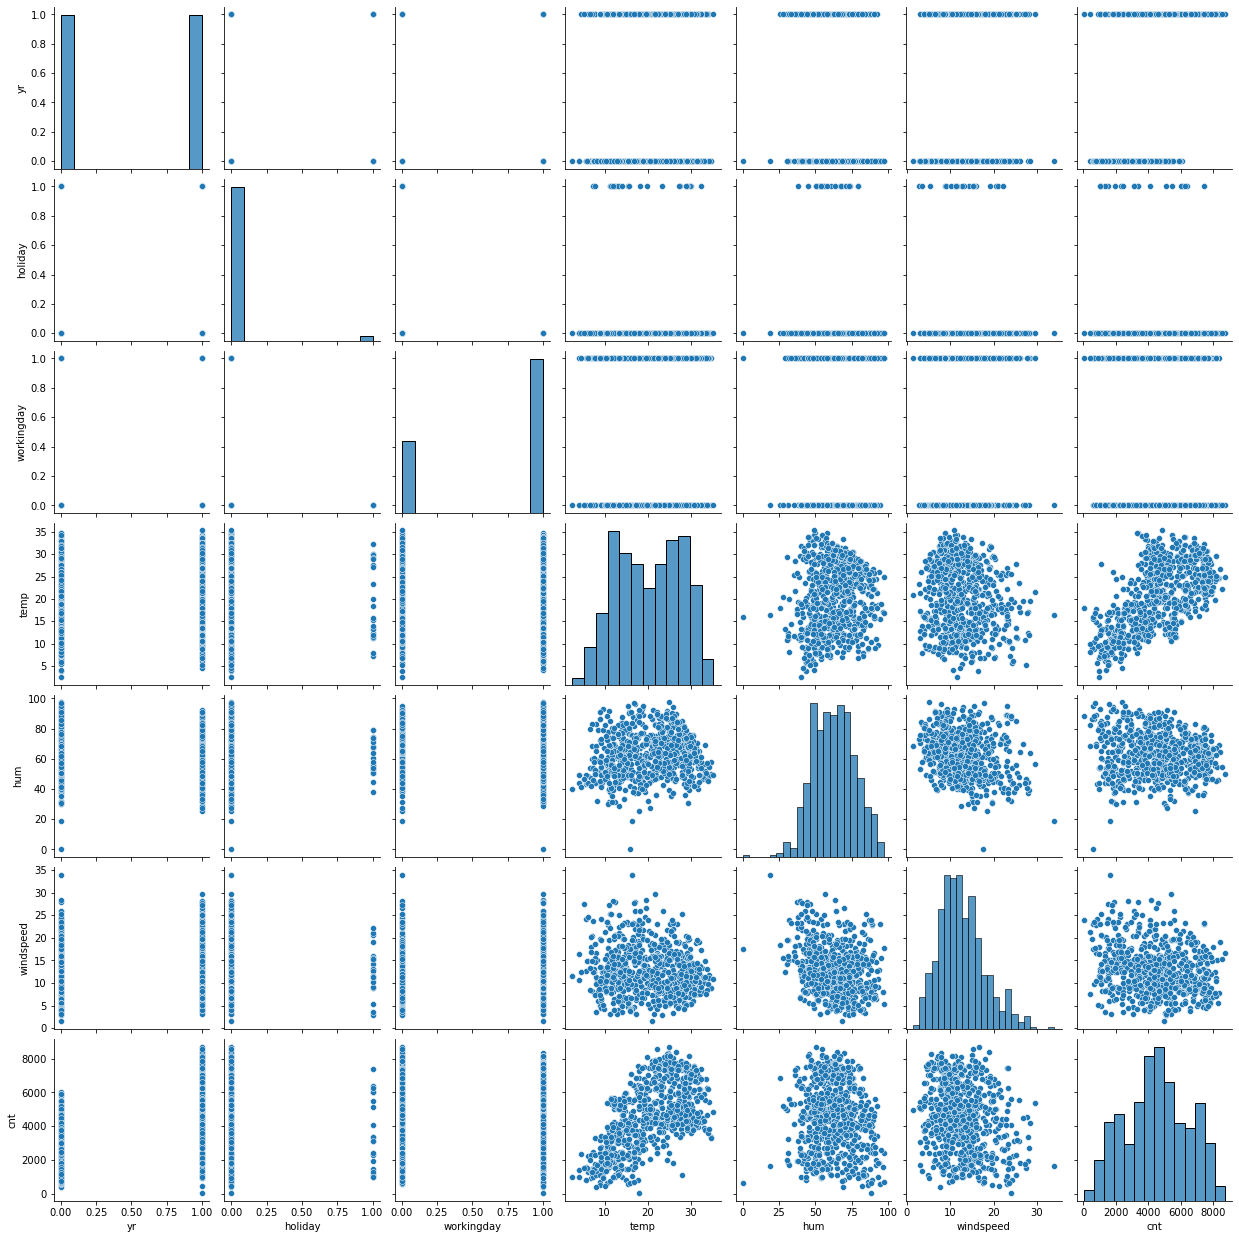

In [11]:
# Let's make a pairplot of all the variables
sns.pairplot(bike)
plt.show()

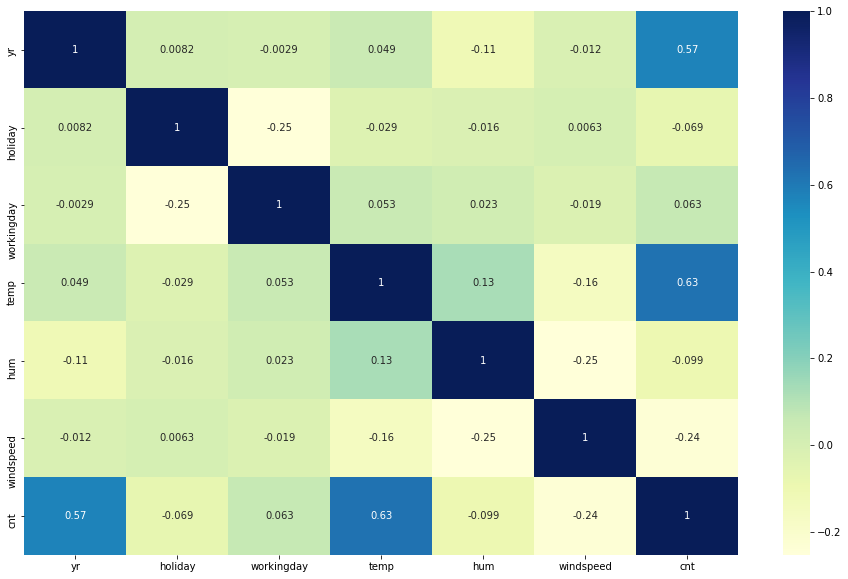

In [12]:
# Let's check the correlation to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

Text(0, 0.5, 'count of rental bikes')

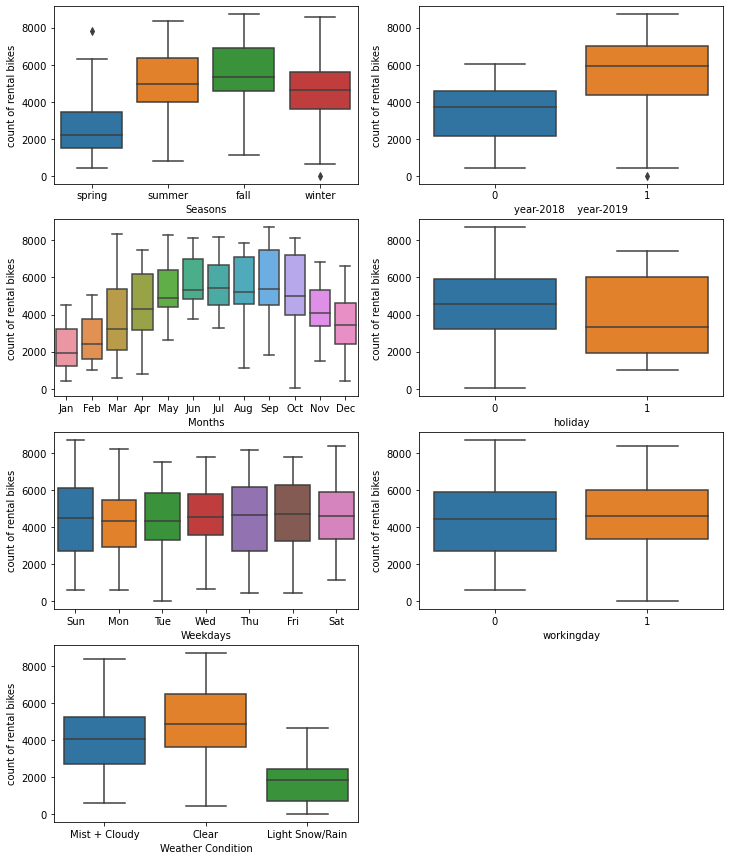

In [13]:
#Lets make some boxplots for the category variables and visualise how the demand varies acros various categories
plt.figure(figsize=(12,15))

#Variation across seasons
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.xlabel('Seasons')
plt.ylabel('count of rental bikes')


#Variation during year 2018(0) and 2019(1)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.xlabel('year-2018    year-2019')
plt.ylabel('count of rental bikes')

#Variation across months
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.xlabel('Months')
plt.ylabel('count of rental bikes')

#Variation on an holiday and otherwise
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.xlabel('holiday')
plt.ylabel('count of rental bikes')

#variation across weekdays
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xlabel('Weekdays')
plt.ylabel('count of rental bikes')

#if day is neither weekend nor holiday is 1, otherwise is 0.
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.xlabel('workingday')
plt.ylabel('count of rental bikes')

#variation across different weather conditions
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xlabel('Weather Condition')
plt.ylabel('count of rental bikes')


Text(0, 0.5, 'total count of rental bikes')

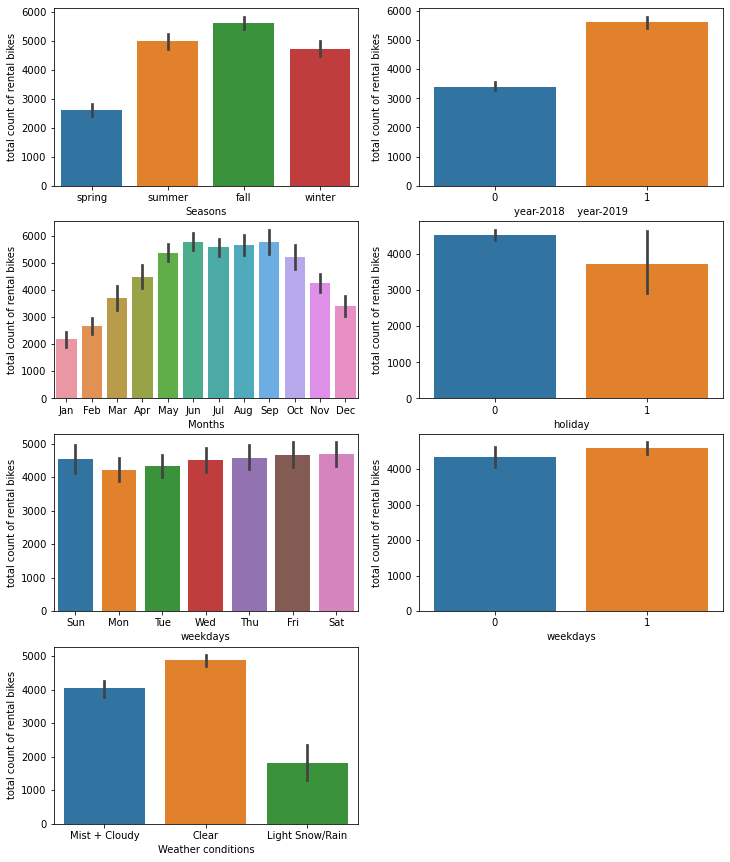

In [14]:
#Lets make some barplots to visualise the deals across various categories
plt.figure(figsize=(12,15))

#seasonwise deals
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', data = bike)
plt.xlabel('Seasons')
plt.ylabel('total count of rental bikes')

#deals during 2018(0) and 2019(1)
plt.subplot(4,2,2)
sns.barplot(x = 'yr', y = 'cnt', data = bike)
plt.xlabel('year-2018    year-2019')
plt.ylabel('total count of rental bikes')

#total deals across months
plt.subplot(4,2,3)
sns.barplot(x = 'mnth', y = 'cnt', data = bike)
plt.xlabel('Months')
plt.ylabel('total count of rental bikes')

#deals on an holiday and otherwise
plt.subplot(4,2,4)
sns.barplot(x = 'holiday', y = 'cnt', data = bike)
plt.xlabel('holiday')
plt.ylabel('total count of rental bikes')

#deals during weekdays
plt.subplot(4,2,5)
sns.barplot(x = 'weekday', y = 'cnt', data = bike)
plt.xlabel('weekdays')
plt.ylabel('total count of rental bikes')

#if day is neither weekend nor holiday is 1, otherwise is 0.
plt.subplot(4,2,6)
sns.barplot(x = 'workingday', y = 'cnt', data = bike)
plt.xlabel('weekdays')
plt.ylabel('total count of rental bikes')

#deals during different weather conditions
plt.subplot(4,2,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xlabel('Weather conditions')
plt.ylabel('total count of rental bikes')


# Data Preparation

### Dummy Variable

In [15]:
# lets convert the categorical variables with more than two categories into dummy variables, 
# which is a form most suitable to train our model

#list of category columns with more than two categories
mul_cat_var = ['season','mnth','weekday','weathersit']

#dummy variables for season
sea = pd.get_dummies(bike['season'], drop_first = True)


#dummy variables for month
mont = pd.get_dummies(bike['mnth'], drop_first = True)


#dummy variables for weekday
week_day = pd.get_dummies(bike['weekday'], drop_first = True)


#dummy variables for weekday
weather_sit = pd.get_dummies(bike['weathersit'], drop_first = True)


In [16]:
# lets include the new derived dummy variables with original dataframe 
bike = pd.concat([bike, sea, mont, week_day, weather_sit], axis = 1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,Mon,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.420847,65.2917,23.458911,...,0,0,0,0,0,0,0,0,0,1
726,spring,1,Dec,0,Sat,1,Mist + Cloudy,10.386653,59.0000,10.416557,...,0,0,0,1,0,0,0,0,0,1
727,spring,1,Dec,0,Sun,0,Mist + Cloudy,10.386653,75.2917,8.333661,...,0,0,0,0,1,0,0,0,0,1
728,spring,1,Dec,0,Mon,0,Clear,10.489153,48.3333,23.500518,...,0,0,1,0,0,0,0,0,0,0


In [17]:
# lets Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
bike.drop(mul_cat_var, axis = 1, inplace = True)

In [18]:
#Our master dataset
bike

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Splitting data into Train and Test sets

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 108)

In [20]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
714,1,0,0,14.862500,83.8750,6.749714,3786,0,0,1,...,0,0,1,0,0,0,0,0,0,1
10,0,0,1,6.932731,68.6364,8.182844,1263,1,0,0,...,0,0,0,0,0,0,0,1,0,1
650,1,0,0,16.126653,49.4583,9.791514,7109,0,0,1,...,1,0,0,0,1,0,0,0,0,0
525,1,0,0,29.793347,53.8333,8.959307,6598,0,1,0,...,0,0,1,0,0,0,0,0,0,0
655,1,0,1,21.422500,72.8333,15.874779,7509,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,0,1,25.420000,83.5417,20.917400,3872,0,1,0,...,0,0,0,0,0,1,0,0,0,1
594,1,0,0,27.811653,60.3333,11.917089,7865,0,0,0,...,0,0,0,0,1,0,0,0,0,0
366,1,1,0,11.194763,38.1304,22.087555,1951,1,0,0,...,0,0,0,0,0,0,1,0,0,0
459,1,0,1,17.835000,37.4167,14.708443,6457,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling: All the features will lie in same range

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
#lets rescale all the collumns except binary-numeric and dummy variables using Scaler
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
714,1,0,0,0.347618,0.808014,0.146366,0.420543,0,0,1,...,0,0,1,0,0,0,0,0,0,1
10,0,0,1,0.094844,0.589279,0.199940,0.103344,1,0,0,...,0,0,0,0,0,0,0,1,0,1
650,1,0,0,0.387915,0.313995,0.260076,0.838320,0,0,1,...,1,0,0,0,1,0,0,0,0,0
525,1,0,0,0.823563,0.376794,0.228966,0.774076,0,1,0,...,0,0,1,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.649521,0.487485,0.888610,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,0,1,0.684155,0.803230,0.675992,0.431355,0,1,0,...,0,0,0,0,0,1,0,0,0,1
594,1,0,0,0.760393,0.470095,0.339536,0.933367,0,0,0,...,0,0,0,0,1,0,0,0,0,0
366,1,1,0,0.230703,0.151394,0.719736,0.189842,1,0,0,...,0,0,0,0,0,0,1,0,0,0
459,1,0,1,0.442371,0.141149,0.443885,0.756349,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# lets devide the training  data into inputs(X) and outputs(Y) for trainning our model
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
y_train

714    0.420543
10     0.103344
650    0.838320
525    0.774076
655    0.888610
         ...   
116    0.431355
594    0.933367
366    0.189842
459    0.756349
145    0.532562
Name: cnt, Length: 510, dtype: float64

## Lets use Recursive Feature Elimination(RFE) to get best set of features 

In [25]:
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
#lets run RFE by setting it to output 15 best features
lm = LinearRegression()
lm.fit(X_train, y_train) 

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 5),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 4),
 ('Sep', False, 10),
 ('Mon', False, 14),
 ('Sat', False, 8),
 ('Sun', True, 1),
 ('Thu', False, 9),
 ('Tue', False, 13),
 ('Wed', False, 12),
 ('Light Snow/Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [28]:
#recommended columns from RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Aug', 'Dec', 'Jul', 'Nov', 'Sun', 'Light Snow/Rain',
       'Mist + Cloudy'],
      dtype='object')

In [29]:
#remaining columns
X_train.columns[~ rfe.support_]

Index(['summer', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Sep', 'Mon', 'Sat',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

## Building model using stats model(detailed statistics)

In [30]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
#include constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe

,const,yr,holiday,workingday,temp,hum,windspeed,spring,winter,Aug,Dec,Jul,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.347618,0.808014,0.146366,0,1,0,1,0,0,0,0,1
10,1.0,0,0,1,0.094844,0.589279,0.199940,1,0,0,0,0,0,0,0,1
650,1.0,1,0,0,0.387915,0.313995,0.260076,0,1,0,0,0,0,1,0,0
525,1.0,1,0,0,0.823563,0.376794,0.228966,0,0,0,0,0,0,0,0,0
655,1.0,1,0,1,0.556729,0.649521,0.487485,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.684155,0.803230,0.675992,0,0,0,0,0,0,0,0,1
594,1.0,1,0,0,0.760393,0.470095,0.339536,0,0,1,0,0,0,1,0,0
366,1.0,1,1,0,0.230703,0.151394,0.719736,1,0,0,0,0,0,0,0,0
459,1.0,1,0,1,0.442371,0.141149,0.443885,0,0,0,0,0,0,0,0,0


In [32]:
#lets train using the features suggested by RFE
lm = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.67e-186
Time:                        22:09:11   Log-Likelihood:                 470.89
No. Observations:                 510   AIC:                            -909.8
Df Residuals:                     494   BIC:                            -842.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2658      0.029     

In [34]:
#lets train with original set of inputs from X_train
#X_train_whole set
X_train_who = X_train

In [35]:
X_train_who = sm.add_constant(X_train_who)
X_train_who

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.347618,0.808014,0.146366,0,0,1,...,0,0,1,0,0,0,0,0,0,1
10,1.0,0,0,1,0.094844,0.589279,0.199940,1,0,0,...,0,0,0,0,0,0,0,1,0,1
650,1.0,1,0,0,0.387915,0.313995,0.260076,0,0,1,...,1,0,0,0,1,0,0,0,0,0
525,1.0,1,0,0,0.823563,0.376794,0.228966,0,1,0,...,0,0,1,0,0,0,0,0,0,0
655,1.0,1,0,1,0.556729,0.649521,0.487485,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.684155,0.803230,0.675992,0,1,0,...,0,0,0,0,0,1,0,0,0,1
594,1.0,1,0,0,0.760393,0.470095,0.339536,0,0,0,...,0,0,0,0,1,0,0,0,0,0
366,1.0,1,1,0,0.230703,0.151394,0.719736,1,0,0,...,0,0,0,0,0,0,1,0,0,0
459,1.0,1,0,1,0.442371,0.141149,0.443885,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
org_lm = sm.OLS(y_train,X_train_who).fit()

In [37]:
print(org_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.03e-177
Time:                        22:09:11   Log-Likelihood:                 480.11
No. Observations:                 510   AIC:                            -904.2
Df Residuals:                     482   BIC:                            -785.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2533      0.037     

#### Some observations based on comparing the stats of both the models(trained on X_train_who vs X_train_rfe)
- Both the models explians about 84% of the varience in the data approximately
- There are many features in X_train_who model whose coefficients are not significant as compared to the feature
  coefficients of X_train_rfe model
- lets go ahead with model trained with X_train_rfe as it has good over all accuracy and significant feature coefficients

### Let us proceed to find the VIFs for our model

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,14.49
4,hum,12.98
2,workingday,5.25
5,windspeed,4.44
7,winter,2.80
6,spring,2.47
14,Mist + Cloudy,2.43
0,yr,2.02
12,Sun,1.89
11,Nov,1.82


### Since temp has VIF value greater than 10 which is quite high, lets drop it and recompute the VIF

In [39]:
X_train_rfe.drop(['temp'], axis = 1, inplace = True)
X_train_rfe

,const,yr,holiday,workingday,hum,windspeed,spring,winter,Aug,Dec,Jul,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.808014,0.146366,0,1,0,1,0,0,0,0,1
10,1.0,0,0,1,0.589279,0.199940,1,0,0,0,0,0,0,0,1
650,1.0,1,0,0,0.313995,0.260076,0,1,0,0,0,0,1,0,0
525,1.0,1,0,0,0.376794,0.228966,0,0,0,0,0,0,0,0,0
655,1.0,1,0,1,0.649521,0.487485,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.803230,0.675992,0,0,0,0,0,0,0,0,1
594,1.0,1,0,0,0.470095,0.339536,0,0,1,0,0,0,1,0,0
366,1.0,1,1,0,0.151394,0.719736,1,0,0,0,0,0,0,0,0
459,1.0,1,0,1,0.141149,0.443885,0,0,0,0,0,0,0,0,0


In [40]:
#lets recompute the VIF
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,7.14
2,workingday,4.61
4,windspeed,3.75
6,winter,2.74
13,Mist + Cloudy,2.10
0,yr,1.86
10,Nov,1.77
11,Sun,1.77
5,spring,1.75
8,Dec,1.37


#### hum is the feature with max VIF, Since a VIF values within threshold of 5 to 8 is considered optimum lets not remove it. 
#### We will now proceed to train the model with the above obtained models

In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.61e-151
Time:                        22:09:11   Log-Likelihood:                 386.13
No. Observations:                 510   AIC:                            -742.3
Df Residuals:                     495   BIC:                            -678.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5087      0.028     

#### From the stats we see that the feature Jul has coefficient which is highly insignificant with p-value = 0.947.
#### Lets drop that and train again

In [42]:
X_train_rfe.drop(['Jul'] , axis = 1, inplace = True)
X_train_rfe

,const,yr,holiday,workingday,hum,windspeed,spring,winter,Aug,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.808014,0.146366,0,1,0,1,0,0,0,1
10,1.0,0,0,1,0.589279,0.199940,1,0,0,0,0,0,0,1
650,1.0,1,0,0,0.313995,0.260076,0,1,0,0,0,1,0,0
525,1.0,1,0,0,0.376794,0.228966,0,0,0,0,0,0,0,0
655,1.0,1,0,1,0.649521,0.487485,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.803230,0.675992,0,0,0,0,0,0,0,1
594,1.0,1,0,0,0.470095,0.339536,0,0,1,0,0,1,0,0
366,1.0,1,1,0,0.151394,0.719736,1,0,0,0,0,0,0,0
459,1.0,1,0,1,0.141149,0.443885,0,0,0,0,0,0,0,0


In [43]:
#lets check how the VIF is affected
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,6.93
2,workingday,4.54
4,windspeed,3.75
6,winter,2.63
12,Mist + Cloudy,2.05
0,yr,1.85
9,Nov,1.77
10,Sun,1.76
5,spring,1.66
8,Dec,1.37


In [44]:
#trainning with new features
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-152
Time:                        22:09:11   Log-Likelihood:                 386.13
No. Observations:                 510   AIC:                            -744.3
Df Residuals:                     496   BIC:                            -685.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5092      0.027     

In [45]:
#since winter is insignificant with high p-value = 0.821, lets drop it and train again.
X_train_rfe.drop(['winter'] , axis = 1, inplace = True)
X_train_rfe

,const,yr,holiday,workingday,hum,windspeed,spring,Aug,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.808014,0.146366,0,0,1,0,0,0,1
10,1.0,0,0,1,0.589279,0.199940,1,0,0,0,0,0,1
650,1.0,1,0,0,0.313995,0.260076,0,0,0,0,1,0,0
525,1.0,1,0,0,0.376794,0.228966,0,0,0,0,0,0,0
655,1.0,1,0,1,0.649521,0.487485,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.803230,0.675992,0,0,0,0,0,0,1
594,1.0,1,0,0,0.470095,0.339536,0,1,0,0,1,0,0
366,1.0,1,1,0,0.151394,0.719736,1,0,0,0,0,0,0
459,1.0,1,0,1,0.141149,0.443885,0,0,0,0,0,0,0


In [46]:
#lets check how the VIF is affected
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,6.57
2,workingday,4.53
4,windspeed,3.75
11,Mist + Cloudy,2.05
0,yr,1.85
9,Sun,1.76
5,spring,1.50
10,Light Snow/Rain,1.21
1,holiday,1.17
6,Aug,1.16


In [47]:
#trainning with new features
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.14e-153
Time:                        22:09:11   Log-Likelihood:                 386.10
No. Observations:                 510   AIC:                            -746.2
Df Residuals:                     497   BIC:                            -691.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5100      0.026     

In [48]:
#since hum is insignificant with high p-value = 0.651, lets drop it and train again.
X_train_rfe.drop(['hum'] , axis = 1, inplace = True)
X_train_rfe

,const,yr,holiday,workingday,windspeed,spring,Aug,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.146366,0,0,1,0,0,0,1
10,1.0,0,0,1,0.199940,1,0,0,0,0,0,1
650,1.0,1,0,0,0.260076,0,0,0,0,1,0,0
525,1.0,1,0,0,0.228966,0,0,0,0,0,0,0
655,1.0,1,0,1,0.487485,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.675992,0,0,0,0,0,0,1
594,1.0,1,0,0,0.339536,0,1,0,0,1,0,0
366,1.0,1,1,0,0.719736,1,0,0,0,0,0,0
459,1.0,1,0,1,0.443885,0,0,0,0,0,0,0


In [49]:
#lets check how the VIF is affected
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.55
2,workingday,3.33
0,yr,1.82
10,Mist + Cloudy,1.51
8,Sun,1.50
4,spring,1.48
7,Nov,1.15
5,Aug,1.14
6,Dec,1.14
1,holiday,1.12


In [50]:
#trainning with new features
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.81e-155
Time:                        22:09:12   Log-Likelihood:                 385.99
No. Observations:                 510   AIC:                            -748.0
Df Residuals:                     498   BIC:                            -697.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5185      0.018     

In [51]:
#since Aug is insignificant with high p-value = 0.160, lets drop it and train again.
X_train_rfe.drop(['Aug'] , axis = 1, inplace = True)
X_train_rfe

,const,yr,holiday,workingday,windspeed,spring,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
714,1.0,1,0,0,0.146366,0,1,0,0,0,1
10,1.0,0,0,1,0.199940,1,0,0,0,0,1
650,1.0,1,0,0,0.260076,0,0,0,1,0,0
525,1.0,1,0,0,0.228966,0,0,0,0,0,0
655,1.0,1,0,1,0.487485,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
116,1.0,0,0,1,0.675992,0,0,0,0,0,1
594,1.0,1,0,0,0.339536,0,0,0,1,0,0
366,1.0,1,1,0,0.719736,1,0,0,0,0,0
459,1.0,1,0,1,0.443885,0,0,0,0,0,0


In [52]:
#lets check how the VIF is affected
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.53
2,workingday,3.26
0,yr,1.82
9,Mist + Cloudy,1.51
7,Sun,1.49
4,spring,1.44
5,Dec,1.13
6,Nov,1.13
1,holiday,1.12
8,Light Snow/Rain,1.08


In [53]:
#trainning with new features
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.94e-155
Time:                        22:09:12   Log-Likelihood:                 384.98
No. Observations:                 510   AIC:                            -748.0
Df Residuals:                     499   BIC:                            -701.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5223      0.018     

- The model seems to be fine now with significant feature coefficients, and a trainning accuracy of 78%

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [54]:
y_train_predict = lm.predict(X_train_rfe)
y_train_predict

714    0.542777
10     0.151053
650    0.807206
525    0.755204
655    0.680213
         ...   
116    0.386970
594    0.795717
366    0.308191
459    0.788400
145    0.529614
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

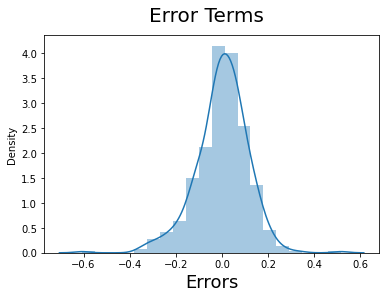

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- As per our assumption error terms are normaly distributed  

## Prediction on test set

In [56]:
#lets rescale  the collumns in test set
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
620,1,0,1,0.674353,0.518540,0.101229,0.925698,0,0,0,...,0,1,0,0,0,0,0,0,0,0
533,1,0,1,0.616630,0.720694,0.331719,0.585617,0,1,0,...,0,0,0,0,0,0,1,0,0,1
272,0,0,1,0.611185,0.533493,0.411189,0.598567,0,0,1,...,0,1,0,1,0,0,0,0,0,0
605,1,0,1,0.769107,0.396531,0.175971,0.912245,0,0,0,...,0,0,0,0,0,1,0,0,0,0
101,0,0,1,0.530590,0.665072,0.582516,0.200277,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0.609006,0.848684,0.277201,0.516973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
63,0,0,0,0.375936,0.736843,0.524890,0.205683,1,0,0,...,0,0,0,0,1,0,0,0,0,1
463,1,0,1,0.513164,0.059809,0.791196,0.646719,0,1,0,...,0,0,0,0,0,0,1,0,0,0
704,1,0,1,0.208211,0.334330,0.331739,0.620317,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# dividing data into predictors and target variables
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_test

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist + Cloudy
620,1,0,1,0.674353,0.518540,0.101229,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
533,1,0,1,0.616630,0.720694,0.331719,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
272,0,0,1,0.611185,0.533493,0.411189,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
605,1,0,1,0.769107,0.396531,0.175971,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
101,0,0,1,0.530590,0.665072,0.582516,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0.609006,0.848684,0.277201,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
63,0,0,0,0.375936,0.736843,0.524890,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
463,1,0,1,0.513164,0.059809,0.791196,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
704,1,0,1,0.208211,0.334330,0.331739,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns[1:]]
X_test_new


,yr,holiday,workingday,windspeed,spring,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
620,1,0,1,0.101229,0,0,0,0,0,0
533,1,0,1,0.331719,0,0,0,0,0,1
272,0,0,1,0.411189,0,0,0,0,0,0
605,1,0,1,0.175971,0,0,0,0,0,0
101,0,0,1,0.582516,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0.277201,0,0,0,0,0,1
63,0,0,0,0.524890,1,0,0,1,0,1
463,1,0,1,0.791196,0,0,0,0,0,0
704,1,0,1,0.331739,0,1,0,0,0,0


In [60]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,holiday,workingday,windspeed,spring,Dec,Nov,Sun,Light Snow/Rain,Mist + Cloudy
620,1.0,1,0,1,0.101229,0,0,0,0,0,0
533,1.0,1,0,1,0.331719,0,0,0,0,0,1
272,1.0,0,0,1,0.411189,0,0,0,0,0,0
605,1.0,1,0,1,0.175971,0,0,0,0,0,0
101,1.0,0,0,1,0.582516,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
134,1.0,0,0,0,0.277201,0,0,0,0,0,1
63,1.0,0,0,0,0.524890,1,0,0,1,0,1
463,1.0,1,0,1,0.791196,0,0,0,0,0,0
704,1.0,1,0,1,0.331739,0,1,0,0,0,0


In [61]:
# Making predictions
y_test_predicted = lm.predict(X_test_new)

In [62]:
y_test_predicted

620    0.837944
533    0.702735
272    0.527140
605    0.827137
101    0.400485
         ...   
134    0.380359
63     0.096299
463    0.738184
704    0.682128
511    0.725708
Length: 219, dtype: float64

### Model Evaluation

Text(0, 0.5, 'y_test_predicted')

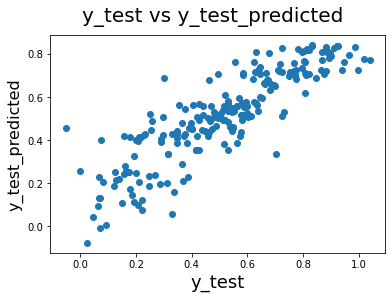

In [63]:
# Plotting y_test and y_test_predicted to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_predicted)
fig.suptitle('y_test vs y_test_predicted', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_predicted', fontsize=16)                          # Y-label

In [64]:
#The Rsquared value on test set
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predicted)

0.761837516079625

### Homoscedasticity - To check if the residuals are having constant variance

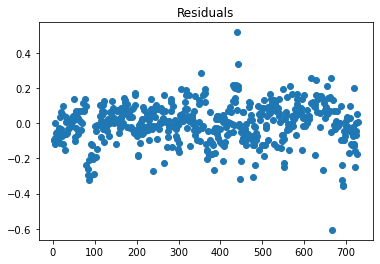

In [65]:
#variance in residuals-trainnig set
plt.scatter(x = y_train.index, y = (y_train - y_train_predict))
plt.title('Residuals')
plt.show()

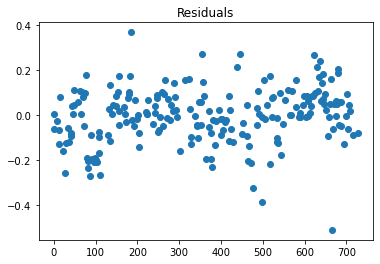

In [66]:
#variance in residuals-testing set
plt.scatter(x = y_test.index, y = (y_test - y_test_predicted))
plt.title('Residuals')
plt.show()

### The residuals are indded of constanr variance, which proves our assumption. 